### Deep-Dive Analysis

#### Uncovering Strategic Insights

- Goal: Answer the question: "What is driving performance by brand, market, and category?"

#### 1. Market Performance (The Global View)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed data
df = pd.read_csv("data/processed/final_campaign_analysis.csv")

# Group by Market to see Engagement and Cost Efficiency
market_summary = df.groupby('market').agg({
    'total_engagement': 'sum',
    'er': 'mean',
    'cpe': 'mean',
    'reward_cost': 'sum'
}).sort_values(by='er', ascending=False)

print("Market Performance Summary:")
print(market_summary)

Market Performance Summary:
         total_engagement        er       cpe  reward_cost
market                                                    
France             185464  6.971338  0.232937        32945
UAE                140025  6.902642  0.260045        26415
UK                 161191  5.088612  0.287760        33645
USA                136014  5.015429  0.392829        33300
Germany            136313  5.008089  0.344448        31595


#### 2. Visualizing the "Efficiency Frontier"

- Insight to look for: A market with a High ER but Low CPE is your "Gold Mine."

C:\Users\Eldu\AppData\Local\Temp\ipykernel_13696\3463391500.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=market_summary.index, y=market_summary['er'], ax=ax1, palette='magma')


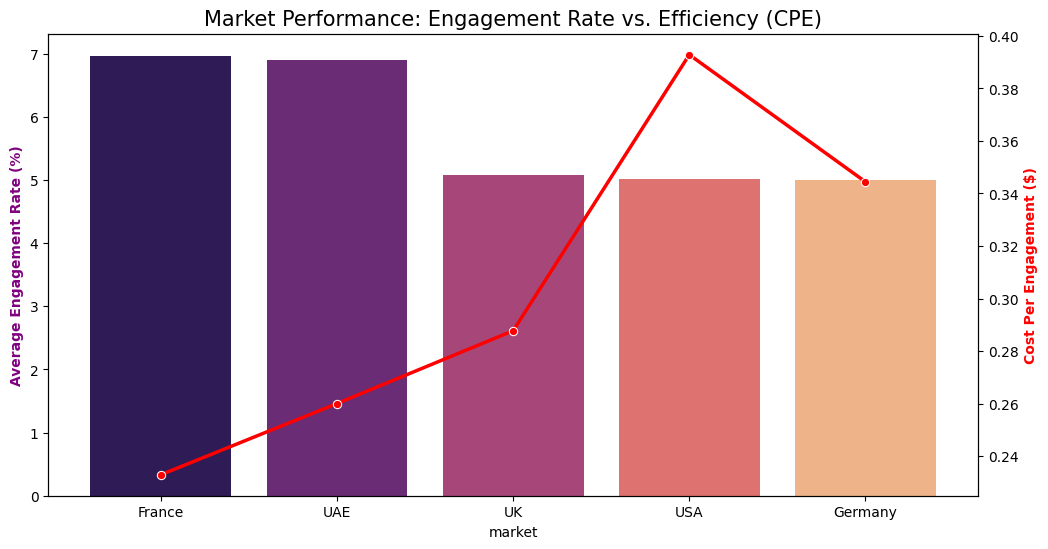

In [2]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar Chart for Engagement Rate
sns.barplot(x=market_summary.index, y=market_summary['er'], ax=ax1, palette='magma')
ax1.set_ylabel('Average Engagement Rate (%)', color='purple', fontweight='bold')
ax1.set_title('Market Performance: Engagement Rate vs. Efficiency (CPE)', fontsize=15)

# Create a second y-axis for CPE
ax2 = ax1.twinx()
sns.lineplot(x=market_summary.index, y=market_summary['cpe'], ax=ax2, color='red', marker='o', linewidth=2.5)
ax2.set_ylabel('Cost Per Engagement ($)', color='red', fontweight='bold')

plt.show()

#### 3. The "Beauty Category" Deep-Dive

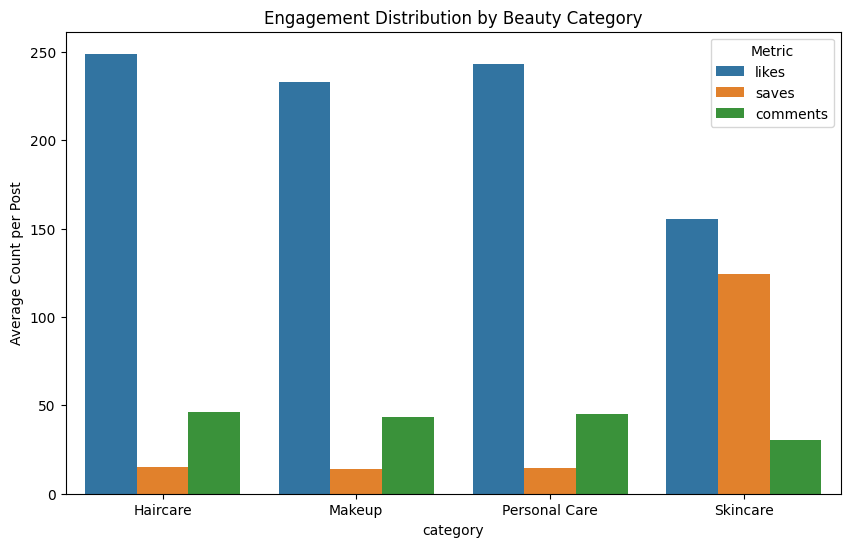

In [3]:
# Analyzing Content Type Behavior
category_behavior = df.groupby('category').agg({
    'likes': 'mean',
    'saves': 'mean',
    'comments': 'mean'
}).reset_index()

# Melt the data for easier plotting
category_melted = category_behavior.melt(id_vars='category', var_name='Metric', value_name='Average_Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=category_melted, x='category', y='Average_Count', hue='Metric')
plt.title('Engagement Distribution by Beauty Category')
plt.ylabel('Average Count per Post')
plt.show()

#### 4. Strategic Collaboration (Actionable Findings)

In [5]:
# Identify the most "Efficient" Reward Type
reward_efficiency = df.groupby('reward_type')['cpe'].mean().sort_values()

print("Reward Efficiency (Lower is Better):")
print(reward_efficiency)

# Recommendation Logic:
top_market = market_summary.index[0]
best_reward = reward_efficiency.index[0]

print(f"\n STRATEGIC RECOMMENDATION ")
print(f"1. Double down on Nano-influencers in {top_market} as they show the highest organic reach.")
print(f"2. Optimize ROI by shifting budget toward '{best_reward}' rewards, which yielded the lowest Cost Per Engagement.")
print(f"3. For Skincare brands, prioritize 'Saves' as a KPI over 'Likes' to measure long-term purchase intent.")

Reward Efficiency (Lower is Better):
reward_type
Sample Product    0.072336
Full Size Set     0.242667
Exclusive Kit     0.580201
Name: cpe, dtype: float64

 STRATEGIC RECOMMENDATION 
1. Double down on Nano-influencers in France as they show the highest organic reach.
2. Optimize ROI by shifting budget toward 'Sample Product' rewards, which yielded the lowest Cost Per Engagement.
3. For Skincare brands, prioritize 'Saves' as a KPI over 'Likes' to measure long-term purchase intent.
